In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Give access to GDrive where the concrete compressive strength dataset is located
from google.colab import drive
drive.mount("/content/drive/")

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/concrete_compressive_strength/concrete_compressive_strength_data.csv")
df.info()

Mounted at /content/drive/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.isna().any()

,0
cement,False
slag,False
ash,False
water,False
superplastic,False
coarseagg,False
fineagg,False
age,False
strength,False


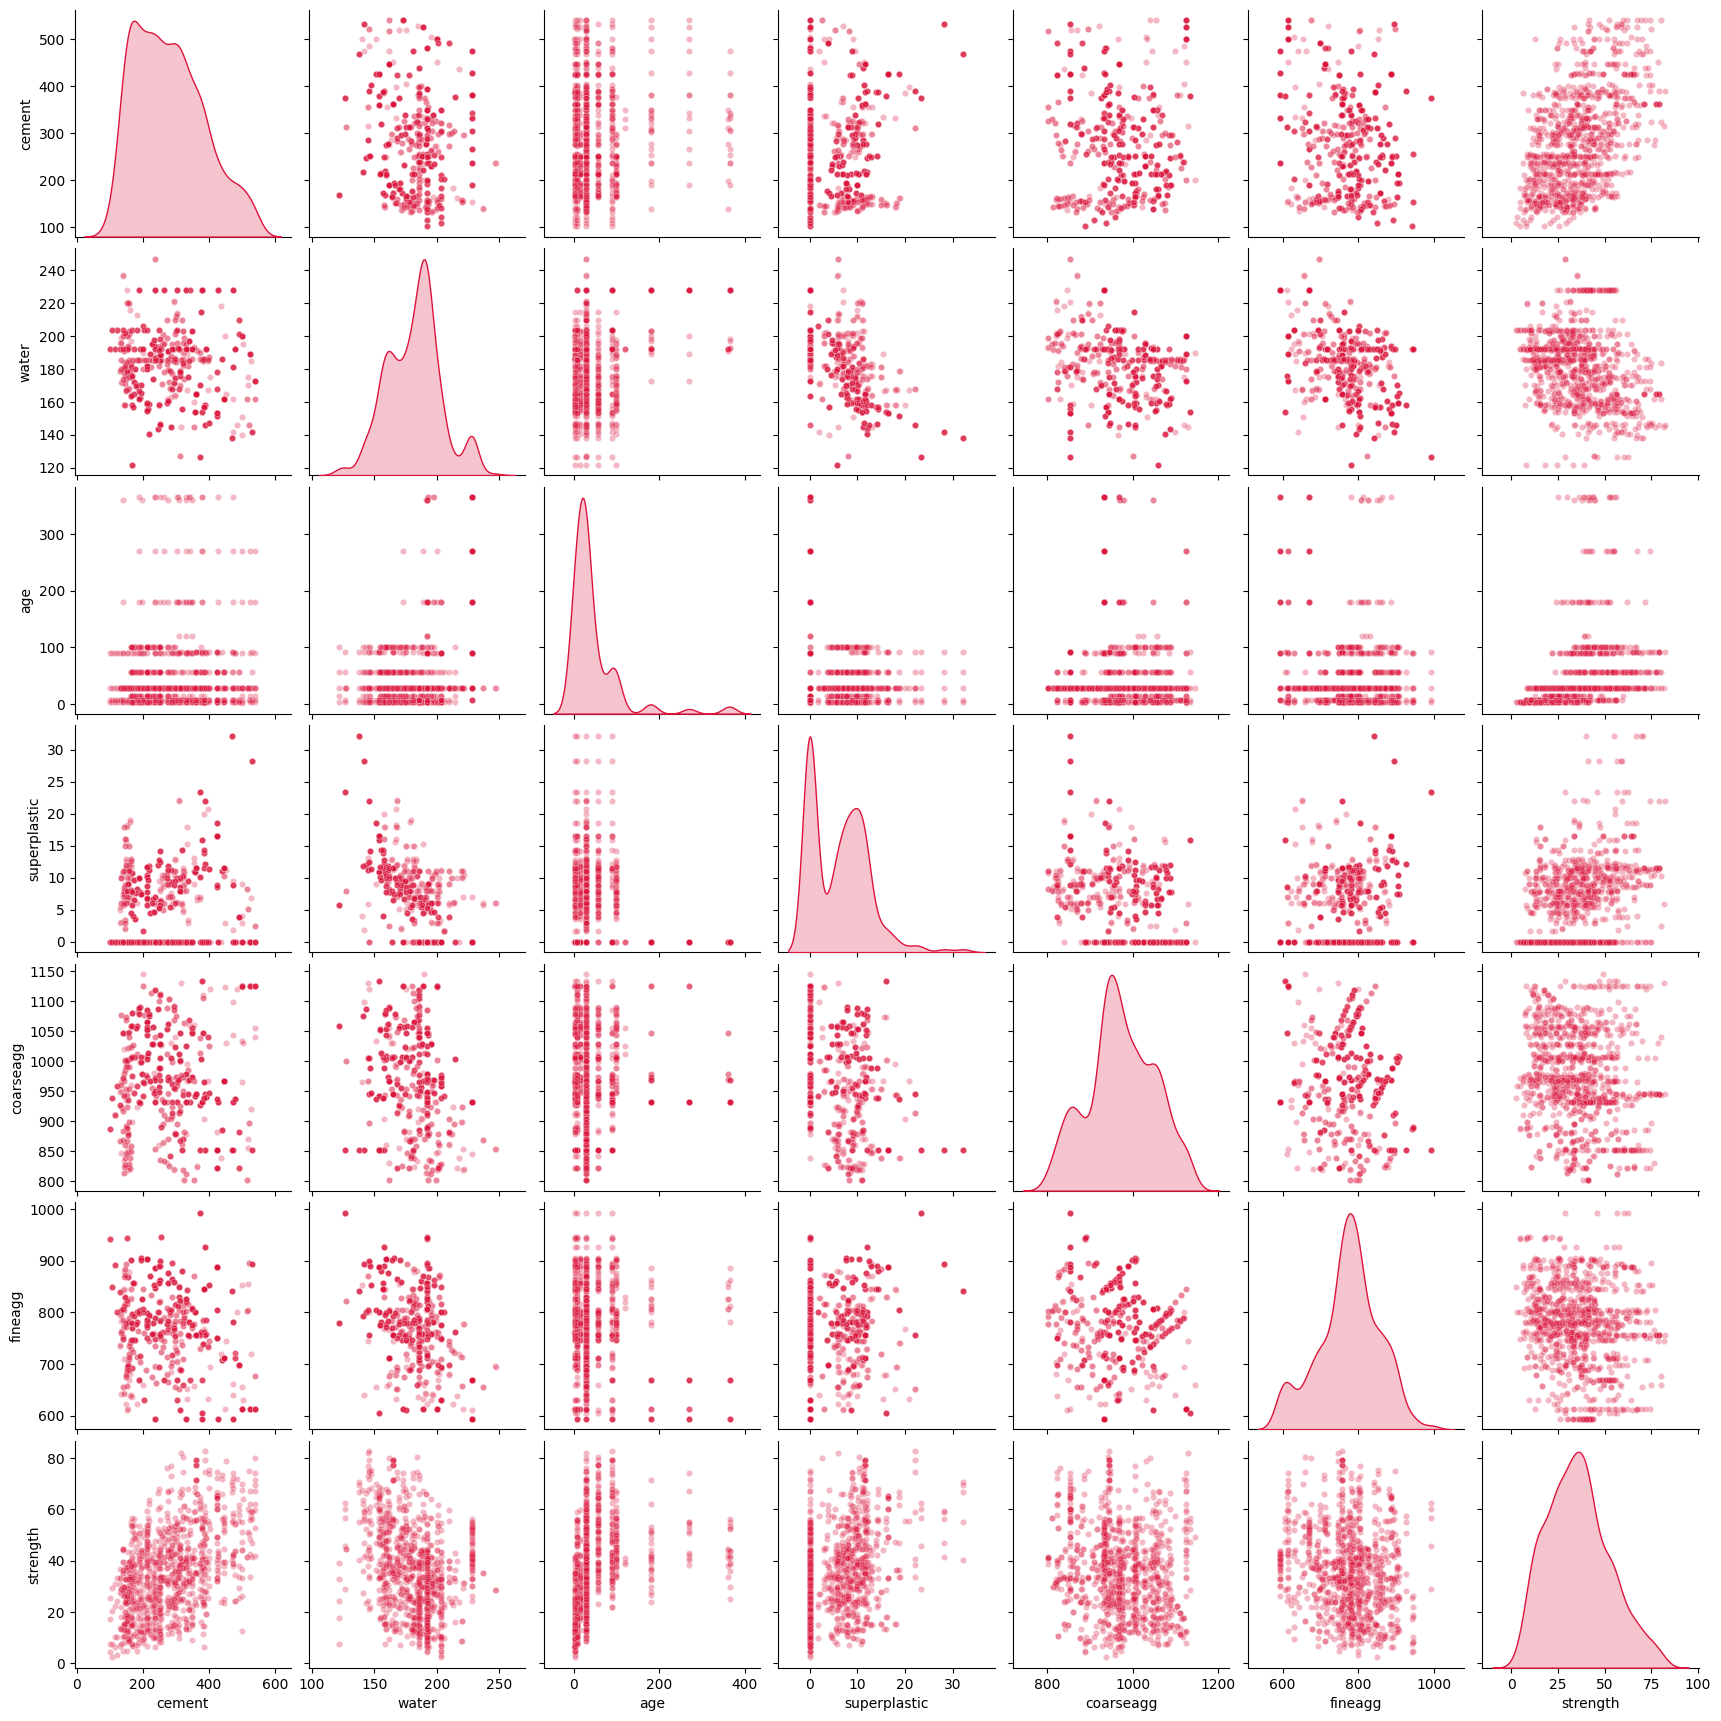

In [5]:
# Visualizing the different variables' relationships
sns.pairplot(data=df[['cement', 'water', 'age', 'superplastic', 'coarseagg', 'fineagg', 'strength']], plot_kws={'alpha':0.3, 's':20, 'color':'crimson'}, diag_kws={'color':'crimson'}, diag_kind='kde')

In [6]:
# Adding features based on the variable relationships
df['log_strength'] = np.log(df['strength'])
df['log_water'] = np.log(df['water'])
df['log_age'] = np.log(df['age'])
df['log_superplastic'] = np.log(df['superplastic'])
df['water_cement_ratio'] = df['water'] / df['cement']

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'cement'),
  Text(1.5, 0, 'slag'),
  Text(2.5, 0, 'ash'),
  Text(3.5, 0, 'water'),
  Text(4.5, 0, 'superplastic'),
  Text(5.5, 0, 'coarseagg'),
  Text(6.5, 0, 'fineagg'),
  Text(7.5, 0, 'age'),
  Text(8.5, 0, 'strength'),
  Text(9.5, 0, 'log_strength'),
  Text(10.5, 0, 'log_water'),
  Text(11.5, 0, 'log_age'),
  Text(12.5, 0, 'log_superplastic'),
  Text(13.5, 0, 'water_cement_ratio')])

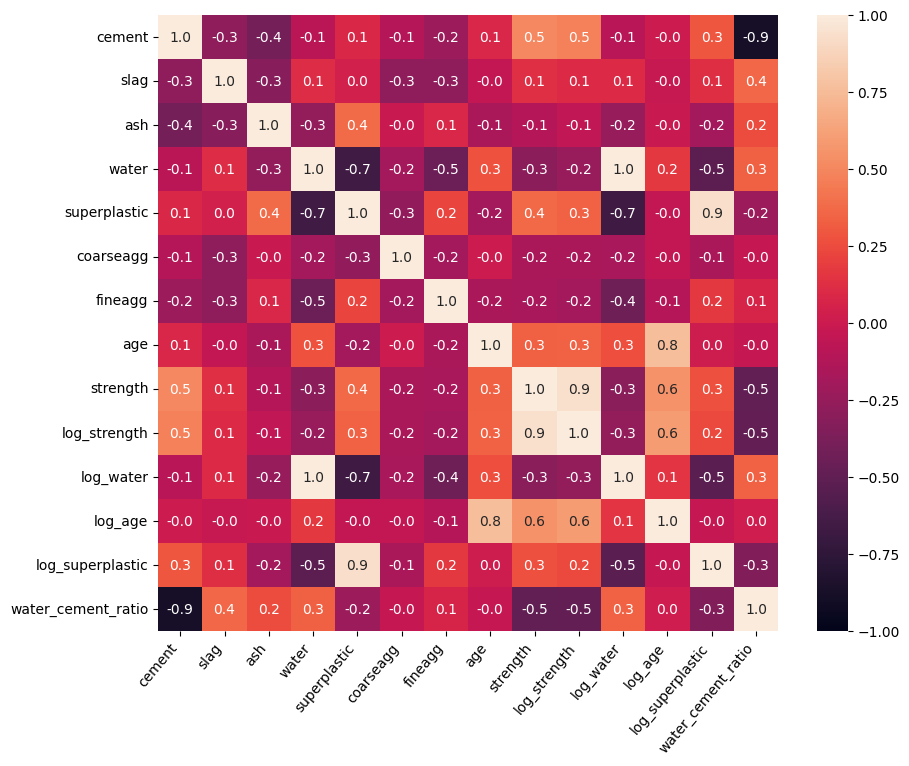

In [7]:
# Checking the correlations of the chosen variables
df_corr = df.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':'10'}, vmax=1, vmin=-1, fmt='.1f')
plt.xticks(rotation=50, ha='right')

In [8]:
df_corr['strength_absval'] = df_corr['strength'].abs()
df_corr[['strength', 'strength_absval']].sort_values(by='strength_absval', ascending=False)[1:]

,strength,strength_absval
log_strength,0.94,0.94
log_age,0.55,0.55
water_cement_ratio,-0.50,0.50
cement,0.50,0.50
superplastic,0.37,0.37
age,0.33,0.33
log_water,-0.31,0.31
water,-0.29,0.29
log_superplastic,0.27,0.27
fineagg,-0.17,0.17


In [9]:
# Selecting predictors, target, and then splitting the data
from sklearn.model_selection import train_test_split
predictors = ['log_age', 'water', 'cement', 'superplastic']
target = ['strength']

X = df[predictors]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Joining the training data for outlier removal
Xy_train = X_train
Xy_train[target] = y_train

<Axes: >

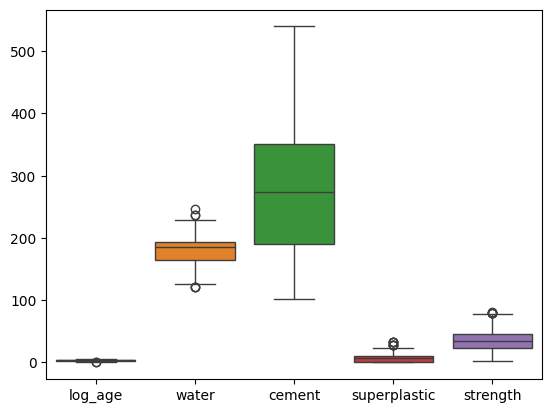

In [11]:
# Checking the outliers visually
sns.boxplot(data=Xy_train)

In [12]:
# Removing outliers in the training set for 1 iteration

# Defining outlier removal function
def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


# Removing outliers in train set only
for i in range(0,len(predictors)):
  Xy_train = remove_outliers(Xy_train, predictors[i])

for j in range(0,len(target)):
  Xy_train = remove_outliers(Xy_train, target[j])

# Splitting to X_train_f and y_train_f
X_train_f = Xy_train[predictors]
y_train_f = Xy_train[target]

<Axes: >

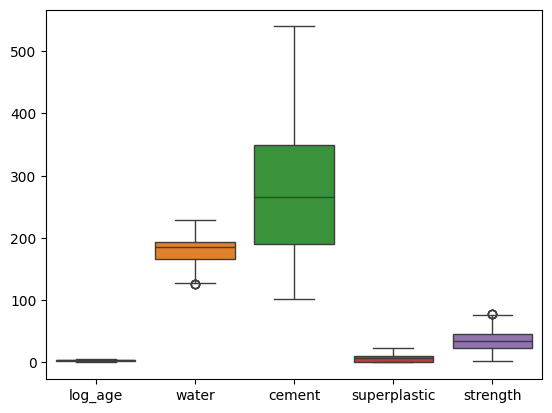

In [13]:
# Checking the boxplot after removing outliers for 1 iteration
sns.boxplot(data=Xy_train)

In [14]:
# Fitting the training data set, then plugging in the X_test to get y_pred
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_f, y_train_f)

y_pred = reg.predict(X_test)

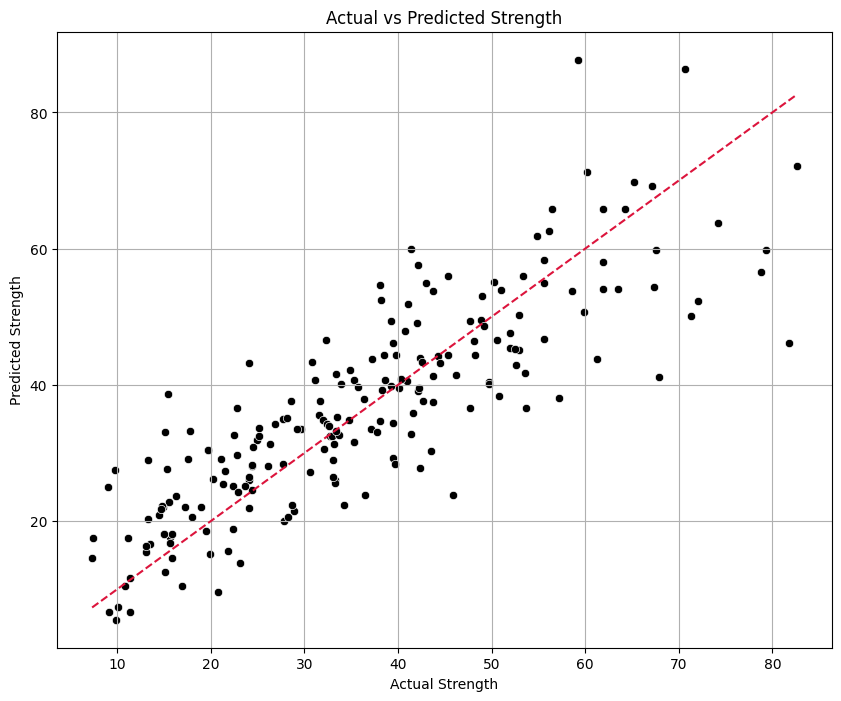

In [15]:
# Plotting Predicted vs. Actual
y_test = np.array(y_test).flatten()
y_pred = y_pred.flatten()

residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='crimson', linestyle='--')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength')
plt.grid(True)
plt.show()

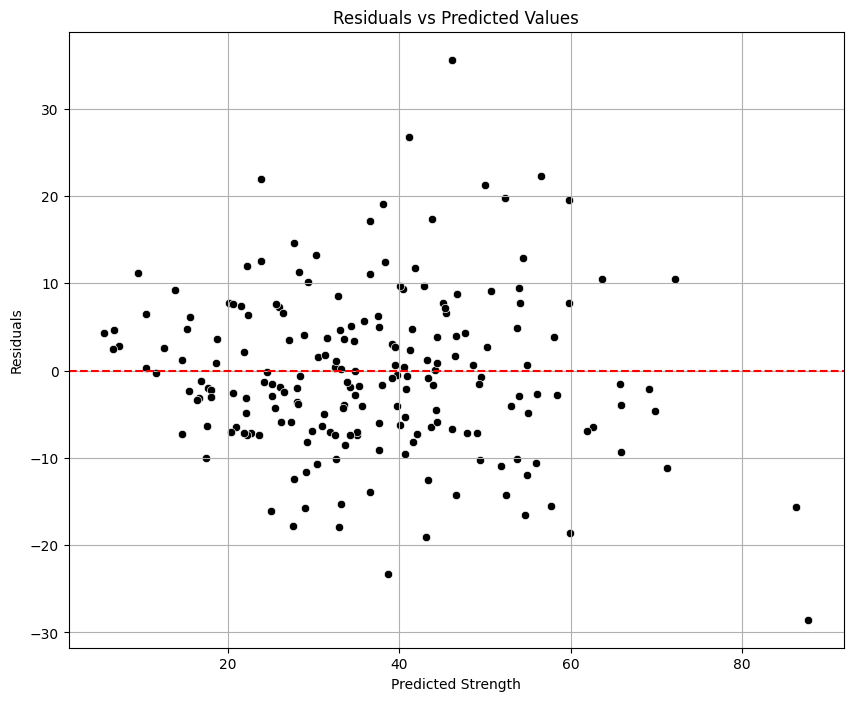

In [16]:
# Plotting Residuals vs. Predicted
residuals = y_test - y_pred

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred, y=residuals, color='black')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Strength')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

In [17]:
# Calculating for model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 7.08
RMSE: 9.21
R² Score: 0.70


In [18]:
# Extracting the coefficients and intercept from the model
coefficients = reg.coef_
intercept = reg.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

feature_names = X_train_f.columns

equation = f"y = {intercept[0]:.2f}"
for coef, name in zip(coefficients[0], feature_names):
    equation += f" + ({coef:.2f} × {name})"

print("Linear Regression Equation:")
print(equation)

Intercept: [16.18945184]
Coefficients: [[ 8.27269096 -0.1760544   0.07614535  0.6645817 ]]
Linear Regression Equation:
y = 16.19 + (8.27 × log_age) + (-0.18 × water) + (0.08 × cement) + (0.66 × superplastic)
